In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
houston_weather_crime_df = pd.read_csv("out/houston_weather_crime.csv")

/tmp/ipykernel_1178129/3374171427.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  houston_weather_crime_df = pd.read_csv("out/houston_weather_crime.csv")


In [3]:
houston_weather_crime_df.columns

Index(['Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'offense_type', 'offense_count', 'beat',
       'premise', 'block_range', 'street_name', 'street_type', 'suffix'],
      dtype='object')

In [4]:
len(houston_weather_crime_df.offense_type.unique())

69

In [5]:
houston_weather_crime_df.offense_type.unique()

array(['Aggravated Assault', 'Burglary', 'Theft', 'Rape', 'Auto Theft',
       'Robbery', 'Murder', '1', 'Simple assault', 'Intimidation',
       'Motor vehicle theft', 'Forcible fondling', 'Forcible rape',
       'Kidnapping, abduction', 'Burglary, Breaking and Entering',
       'All other offenses', 'Driving under the influence',
       'Destruction, damage, vandalism', 'Disorderly conduct',
       'Forcible sodomy', 'All other larceny', 'Theft from motor vehicle',
       'Theft from building', 'Theft of motor vehicle parts or accessory',
       'False pretenses, swindle', 'Credit card, ATM fraud',
       'Embezzlement', 'Counterfeiting, forgery', 'Weapon law violations',
       'Trespass of real property', 'Drunkenness',
       'Drug, narcotic violations', 'Shoplifting', 'Wire fraud',
       'From coin-operated machine or device', 'Statutory rape',
       'Purse-snatching', 'Identify theft', 'Pocket-picking',
       'Drug equipment violations', 'Family offenses, no violence',
      

In [6]:
crime_categories_df = pd.read_csv('data/crime/crimes_categories.csv')
crime_categories_df.columns

Index(['Offense', 'Category'], dtype='object')

In [7]:
crime_categories_map = {}
for index, row in crime_categories_df.iterrows():
    # print(row['c1'], row['c2'])
    crime_categories_map[row['Offense']]=row['Category']
print(crime_categories_map)

{'Rape': 'violent', 'Theft': 'property', 'Burglary': 'property', 'Auto Theft': 'property', 'Murder': 'violent', 'Robbery': 'violent', 'Aggravated Assault': 'violent', 'Simple assault': 'violent', 'Intimidation': 'violent', 'Motor vehicle theft': 'property', 'Forcible fondling': 'violent', 'Forcible rape': 'violent', 'Kidnapping, abduction': 'violent', 'Burglary, Breaking and Entering': 'property', 'All other offenses': 'other offenses', 'Driving under the influence': 'drug, alcohol', 'Destruction, damage, vandalism': 'property', 'Disorderly conduct': 'misdemeanor', 'Forcible sodomy': 'violent', 'All other larceny': 'property', 'Theft from motor vehicle': 'property', 'Theft from building': 'property', 'Theft of motor vehicle parts or accessory': 'property', 'False pretenses, swindle': 'white-collar', 'Credit card, ATM fraud': 'white-collar', 'Embezzlement': 'white-collar', 'Counterfeiting, forgery': 'white-collar', 'Weapon law violations': 'other offenses', 'Trespass of real property': 

In [8]:
houston_weather_crime_df=houston_weather_crime_df.replace({"offense_type": crime_categories_map})

In [9]:
houston_weather_crime_df = houston_weather_crime_df.reset_index()

In [10]:
houston_weather_crime_df.columns

Index(['index', 'Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'offense_type', 'offense_count', 'beat',
       'premise', 'block_range', 'street_name', 'street_type', 'suffix'],
      dtype='object')

In [11]:
houston_weather_crime_df.columns

Index(['index', 'Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'offense_type', 'offense_count', 'beat',
       'premise', 'block_range', 'street_name', 'street_type', 'suffix'],
      dtype='object')

[-17.7  -11.47  -5.24   0.99   7.22  13.45  19.68  25.91  32.14  38.37
  44.6 ] [   824.   6947.  60140. 181977. 239953. 304687. 430451. 584029. 306339.
  45153.]


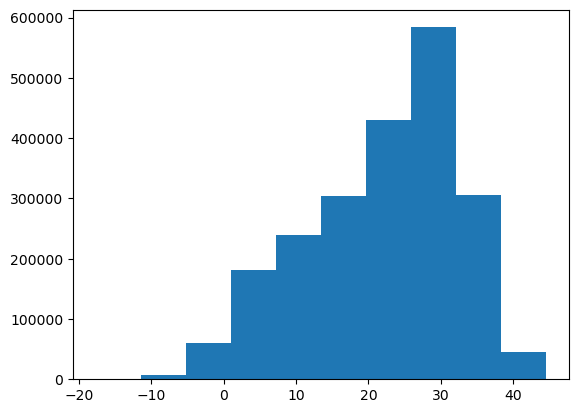

In [12]:
weather_metrics = ['apparent_temperature (°C)']
for w in weather_metrics:
    n, bins, patches = plt.hist(houston_weather_crime_df[w])
    print(bins, n)
    plt.show()

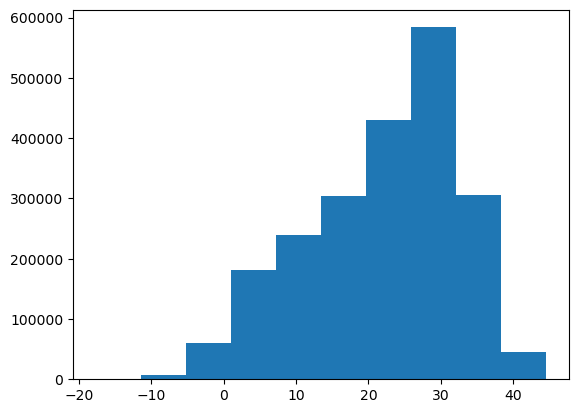

In [13]:
n, bins, patches = plt.hist(houston_weather_crime_df['apparent_temperature (°C)'])

In [14]:
weather_df = pd.read_csv('out/houston_weather.csv')
weather_df.columns

Index(['Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

In [15]:
# for every crime category
# crime_cat_df = filtered houston_weather_crime_df
# for all weather metrics of interest
# n, bins, patches = plt.hist(crime_cat_df[w])
# plt.show()
n = [739.,5837.,50875.,55935.,230611.,296785.,429690.,556699.,373682.,59787.]
bins = [-17.7,-11.47,-5.24,0.99,7.22,13.45,19.68,25.91,32.14,38.37,44.6]
weather = np.zeros(len(bins)-1)
for i in range(len(weather)):
    count = 0
    for j, row in weather_df.iterrows():
        if (bins[i] <= row['apparent_temperature (°C)']) and (bins[i+1] >= row['apparent_temperature (°C)']):
             count = count+1
    weather[i]= count;
print(weather)

[   45.   476.  3120.  9321. 13248. 17014. 23945. 31538. 18639.  2534.]


In [16]:
crimes_by_weather = np.divide(n, weather)
print(crimes_by_weather)

print(len(bins))
print(len(crimes_by_weather))

[16.42222222 12.26260504 16.30608974  6.00096556 17.40723128 17.44357588
 17.94487367 17.65169002 20.04839315 23.59392265]
11
10


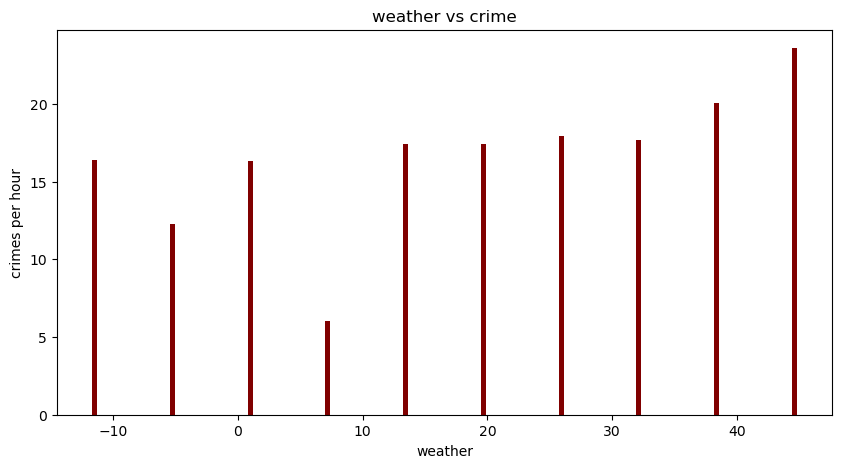

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.bar(bins[1:], crimes_by_weather, color ='maroon',
        width = 0.4)
 
plt.xlabel("weather")
plt.ylabel("crimes per hour")
plt.title("weather vs crime")
plt.show()

['violent' 'property' 'other offenses' 'drug, alcohol' 'misdemeanor'
 'white-collar' 'sex']
['violent' 'property' '1' 'other offenses' 'drug, alcohol' 'misdemeanor'
 'white-collar' 'sex']
violent apparent_temperature (°C)
    apparent_temperature (°C) offense_type
0                        13.2      violent
1                        13.2      violent
2                        13.2      violent
10                       13.0      violent
11                       13.0      violent
[-11.49  -5.28   0.93   7.14  13.35  19.56  25.77  31.98  38.19  44.4 ] [   259.   1379.  12079.  37680.  53017.  67311.  97803. 132529.  84771.
  14689.] [5.75555556 2.89705882 3.87147436 4.12976765 4.00824072 3.98219251
 4.17088149 4.24772436 4.34144218 5.22926308]


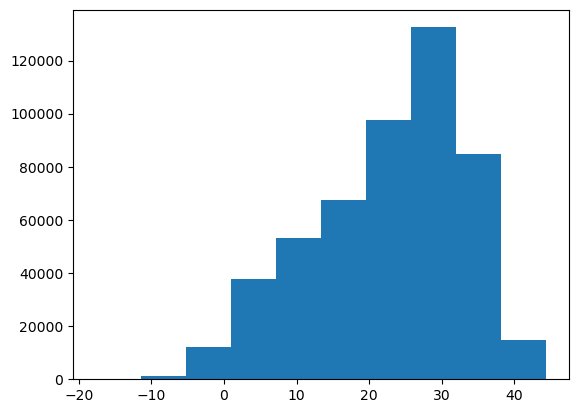

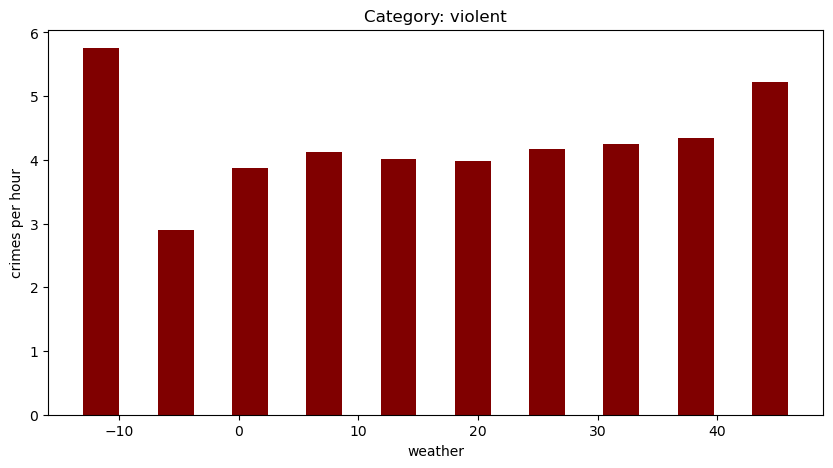

property apparent_temperature (°C)
   apparent_temperature (°C) offense_type
3                       13.2     property
4                       13.2     property
5                       13.2     property
6                       13.2     property
7                       13.2     property
[-11.47  -5.24   0.99   7.22  13.45  19.68  25.91  32.14  38.37  44.6 ] [   476.   5125.  42534. 123980. 161241. 204329. 283207. 385980. 190269.
  25493.] [10.57777778 10.76680672 13.63269231 13.30114795 12.1709692  12.0094628
 11.82739612 12.23856934 10.20811202 10.06037885]


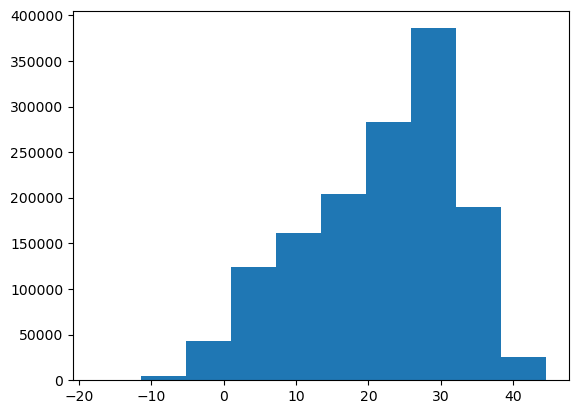

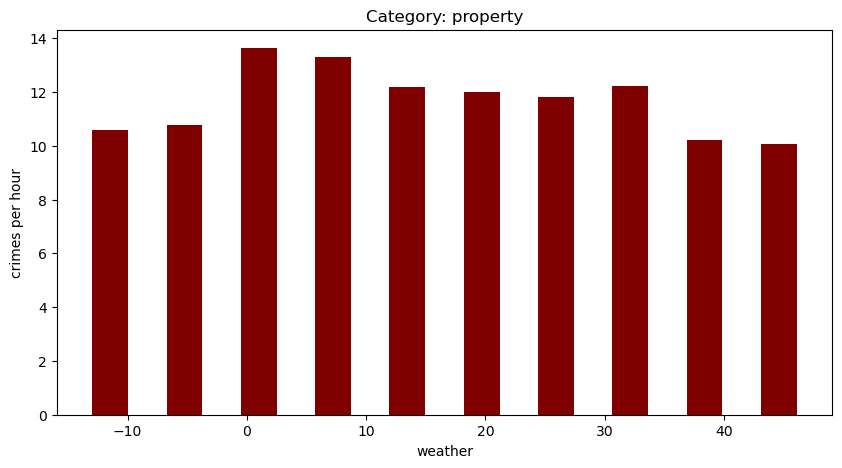

other offenses apparent_temperature (°C)
        apparent_temperature (°C)    offense_type
924834                       38.0  other offenses
924835                       38.0  other offenses
924843                       38.0  other offenses
924853                       38.0  other offenses
924887                       38.4  other offenses
[-11.24  -5.18   0.88   6.94  13.    19.06  25.12  31.18  37.24  43.3 ] [   35.   185.  1834.  6442.  8593. 10381. 15374. 19913. 15075.  3065.] [0.76086957 0.37832311 0.60991021 0.72964096 0.6772541  0.6396574
 0.67777631 0.69111165 0.65849823 0.7316782 ]


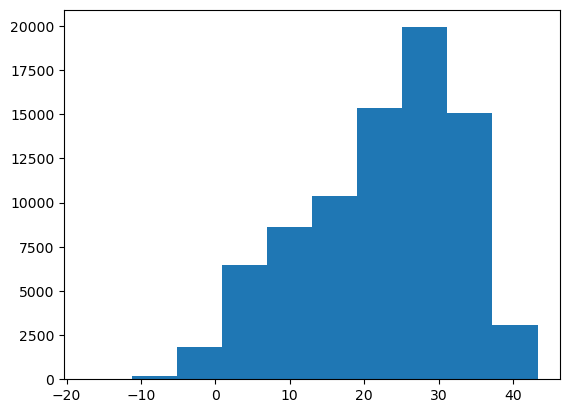

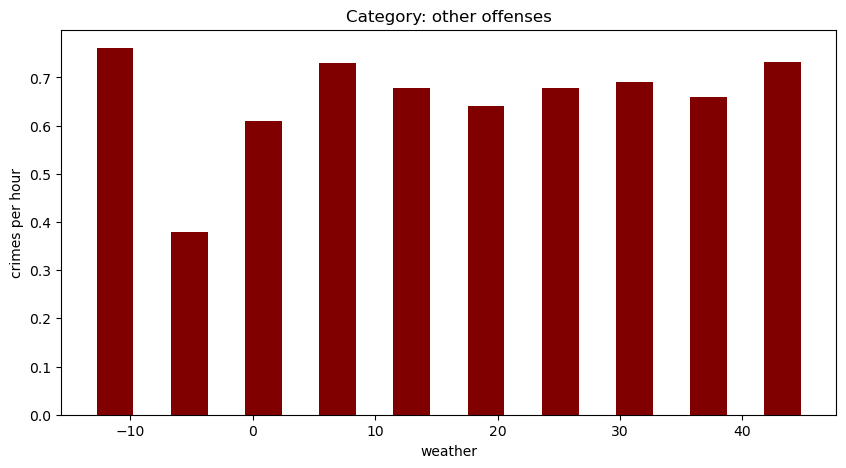

drug, alcohol apparent_temperature (°C)
        apparent_temperature (°C)   offense_type
924837                       38.0  drug, alcohol
924838                       38.0  drug, alcohol
924854                       38.0  drug, alcohol
924857                       38.0  drug, alcohol
924909                       38.4  drug, alcohol
[-10.79  -4.78   1.23   7.24  13.25  19.26  25.27  31.28  37.29  43.3 ] [   32.   181.  1868.  5794.  8194. 10404. 14499. 18166. 15266.  4112.] [0.64       0.33456562 0.55249926 0.64470902 0.6397564  0.64456973
 0.64554764 0.62624104 0.68460469 0.98161852]


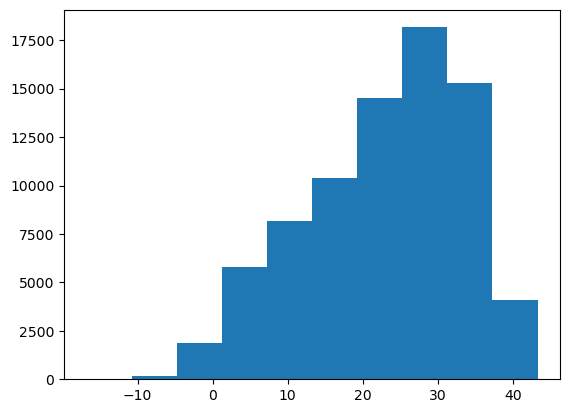

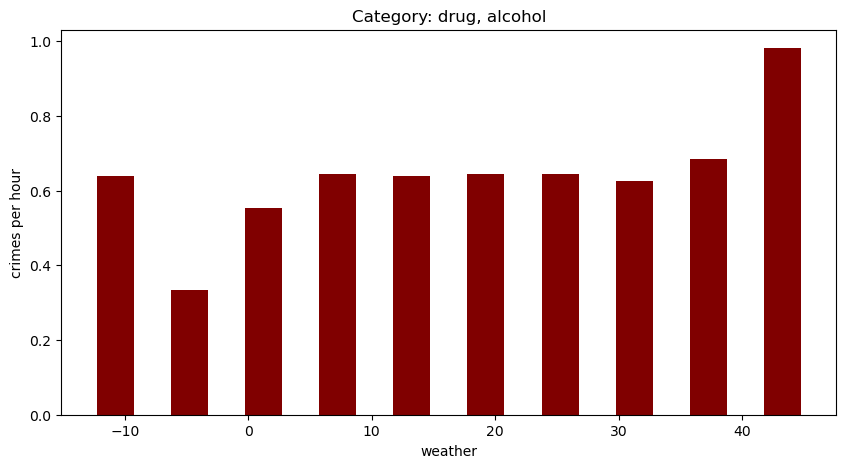

misdemeanor apparent_temperature (°C)
        apparent_temperature (°C) offense_type
924845                       38.0  misdemeanor
924847                       38.0  misdemeanor
924940                       37.7  misdemeanor
925147                       30.2  misdemeanor
925204                       30.8  misdemeanor
[-10.62  -4.64   1.34   7.32  13.3   19.28  25.26  31.24  37.22  43.2 ] [   4.   22.  267.  770. 1059. 1548. 2346. 3060. 2127.  491.] [0.09302326 0.03963964 0.07710078 0.08467121 0.08256022 0.09590484
 0.10445236 0.10548814 0.09538544 0.11729575]


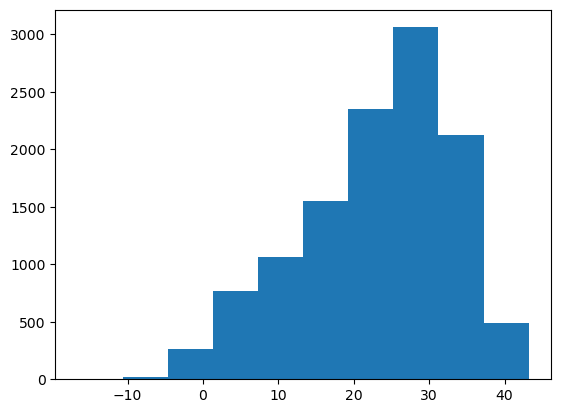

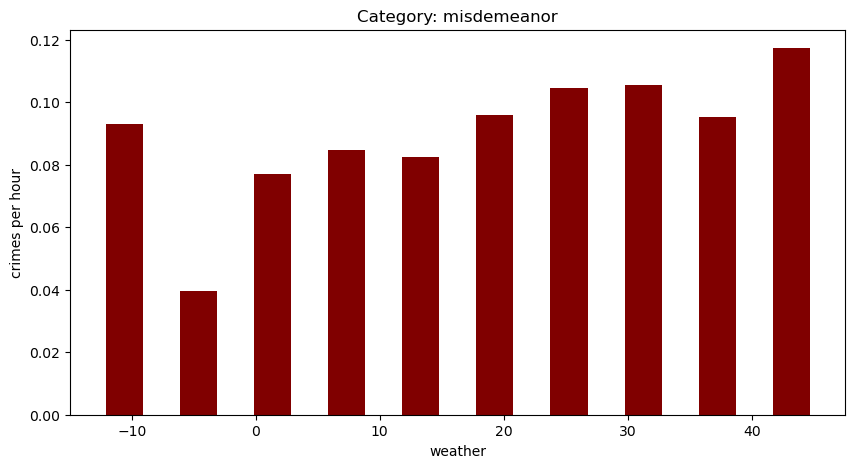

white-collar apparent_temperature (°C)
        apparent_temperature (°C)  offense_type
924879                       38.0  white-collar
924880                       38.0  white-collar
924881                       38.0  white-collar
924884                       38.0  white-collar
924885                       38.0  white-collar
[-11.6  -5.5   0.6   6.7  12.8  18.9  25.   31.1  37.2  43.3] [   15.    90.  1260.  4746.  6485.  7540. 10823. 14571. 10336.  2133.] [0.34090909 0.20179372 0.45438154 0.5521815  0.49842441 0.47010412
 0.48059503 0.50224045 0.44001703 0.4878774 ]


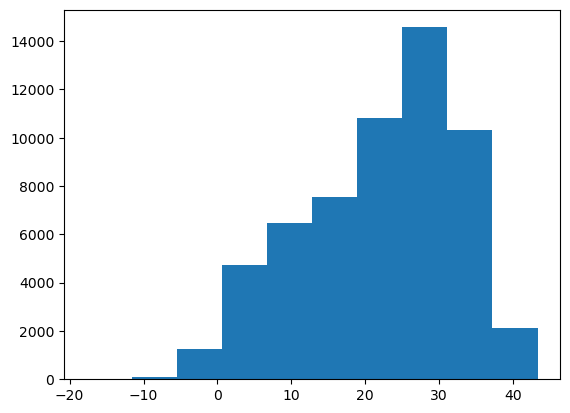

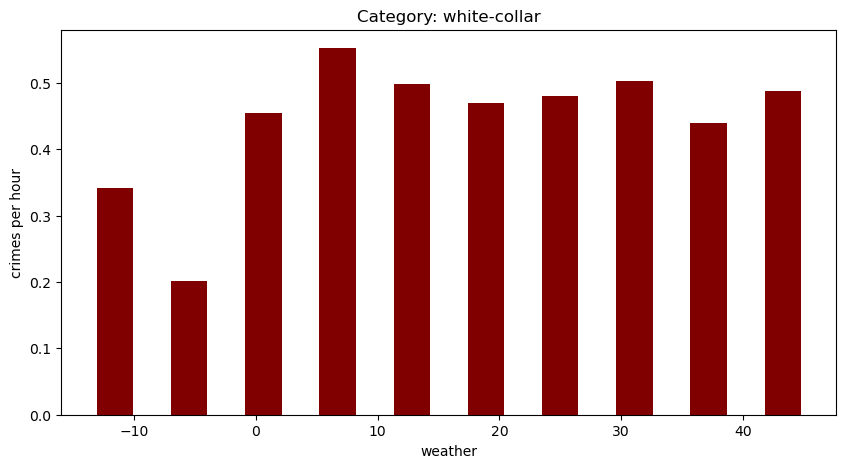

sex apparent_temperature (°C)
        apparent_temperature (°C) offense_type
925145                       30.5          sex
925902                       29.8          sex
926357                       36.9          sex
926379                       36.9          sex
926612                       31.1          sex
[-10.75  -4.8    1.15   7.1   13.05  19.    24.95  30.9   36.85  42.8 ] [1.000e+00 1.200e+01 2.150e+02 5.710e+02 8.030e+02 8.450e+02 1.313e+03
 1.771e+03 1.468e+03 2.300e+02] [0.02040816 0.02218115 0.06607253 0.06403499 0.06410154 0.0528224
 0.05998995 0.06235915 0.06275918 0.04719885]


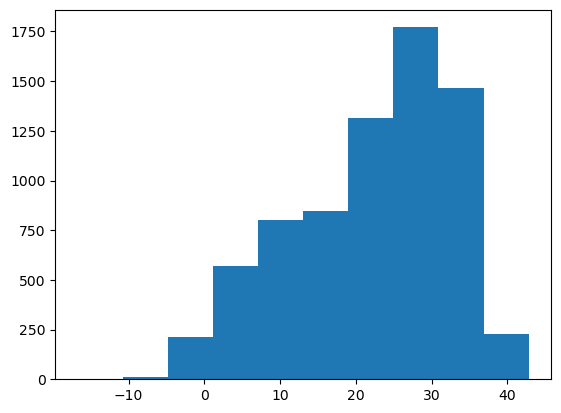

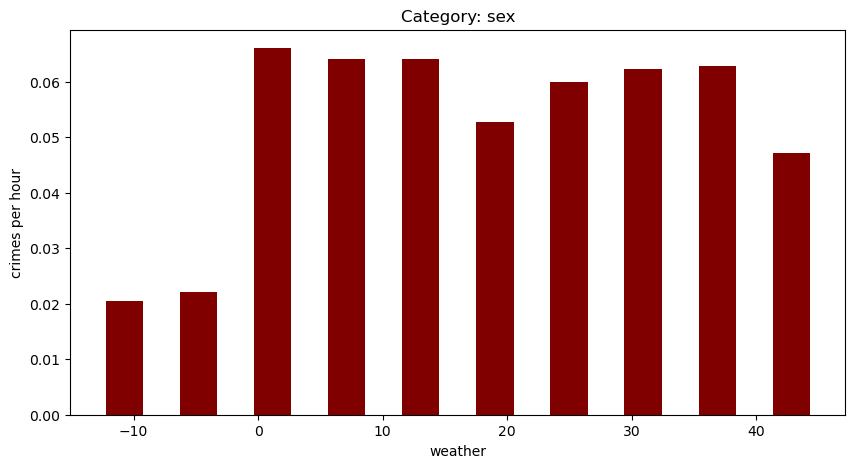

In [18]:
print(crime_categories_df['Category'].unique())
print(houston_weather_crime_df.offense_type.unique())

for c in crime_categories_df['Category'].unique():
    for w in weather_metrics:
        print(c, w)
        sub_df=houston_weather_crime_df[houston_weather_crime_df.offense_type == c]
        print(sub_df[[w, 'offense_type']].head())
        n, bins, patches = plt.hist(sub_df[w])
        weather = np.zeros(len(bins)-1)
        for i in range(len(bins)-1):
            count = 0
            for j, row in weather_df.iterrows():
                if (bins[i] <= row[w]) and (bins[i+1] >= row[w]):
                     count = count+1
            weather[i]= count
        fig = plt.figure(figsize = (10, 5))
        crimes_by_weather = np.divide(n, weather)
        print(bins[1:], n, crimes_by_weather)
        plt.bar(bins[1:], crimes_by_weather, color ='maroon', width=3)
        plt.xlabel("weather")
        plt.ylabel("crimes per hour")
        plt.title("Category: " + c)
        plt.show()

In [19]:
# combined line plot?
# get hourly crime rate (crimes per hour) for day vs night (look at api, if not there use solar radiation)
# percipitation, hour of the day
# weekday vs weekend
# seasonality


In [20]:
num_hours=n = len(houston_weather_crime_df.groupby(['occurrence_date', 'occurrence_hour'], as_index=False)) / 24


['violent' 'property' 'other offenses' 'drug, alcohol' 'misdemeanor'
 'white-collar' 'sex']
['violent' 'property' '1' 'other offenses' 'drug, alcohol' 'misdemeanor'
 'white-collar' 'sex']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
n 4542.375
violent [5.72696002 4.74201271 4.2143152  3.06579708 2.28140565 1.95250282
 1.98816698 2.36528248 3.23575222 3.41187154 3.95013622 4.11612868
 5.44737059 4.3706211  4.97096783 5.56581084 5.53785189 5.64616528
 5.84363907 6.02416137 6.43341864 6.61680288 6.70156031 6.19984039]
n 4542.375
property [12.6667217   7.62002257  7.09826908  5.98519497  5.02754616  5.07487823
  7.12490712 10.73755469 13.66289661 12.97206858 14.14062027 14.0798591
 19.10300228 15.00470569 16.05371639 16.8957869  16.57282809 18.31905116
 19.10476348 17.38099562 16.44844382 15.12270563 15.07251163 11.92261757]
n 4542.375
other offenses [0.95390627 0.75775338 0.60585046 0.37975729 0.25251108 0.18316409
 0.24150362 0.39318638 0.7333168

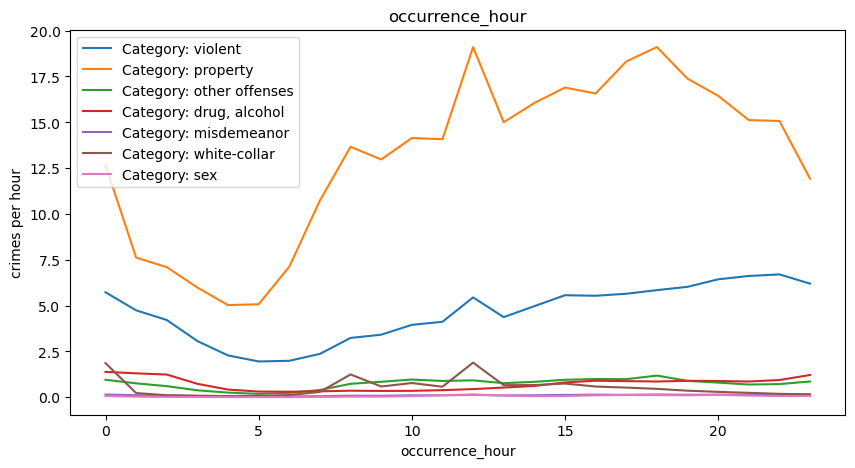

In [21]:
print(crime_categories_df['Category'].unique())
print(houston_weather_crime_df.offense_type.unique())
weather_metrics = ['occurrence_hour']
# 'occurrence_date', 'occurrence_hour'
for w in weather_metrics:
    #n, bins, patches = plt.hist(houston_weather_crime_df[w])
    bins = [i for i in range(24)]
    print(bins)
    # n = len(bins)
    n = num_hours
    #n = np.bincount(houston_weather_crime_df[w])
    fig = plt.figure(figsize = (10, 5))
    plt.title(w)
    for c in crime_categories_df['Category'].unique():
        if c == 'gambling': continue
        # print(c, w, houston_weather_crime_df[w].unique())
        sub_df=houston_weather_crime_df[houston_weather_crime_df.offense_type == c]
        print('n', n)
        # print(sub_df[[w, 'offense_type']].head())
        
        weather = np.zeros(len(bins))
        for i in range(len(bins)):
            # print('&&&', sub_df[w])
            weather[i] = np.count_nonzero(sub_df[w] == i)
            # print('***', c, w, i, weather[i])
        crimes_by_weather = np.divide(weather, n, where=weather!=0)
        print(c, crimes_by_weather)
        plt.plot(bins, crimes_by_weather, label="Category: " + c)
        plt.xlabel(w)
        plt.ylabel("crimes per hour")
        
    plt.legend()
    plt.show()

In [22]:
houston_weather_crime_df.columns

Index(['index', 'Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'offense_type', 'offense_count', 'beat',
       'premise', 'block_range', 'street_name', 'street_type', 'suffix'],
      dtype='object')

In [23]:
crime_categories_df['Category'].unique()

array(['violent', 'property', 'other offenses', 'drug, alcohol',
       'misdemeanor', 'white-collar', 'sex'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    occurrence_hour  offense_count
0                 0         103603
1                 1          67218
2                 2          60767
3                 3          46910
4                 4          36772
5                 5          34677
6                 6          44655
7                 7          64431
8                 8          87910
9                 9          82987
10               10          92441
11               11          92041
12               12         127580
13               13          97748
14               14         105906
15               15         114299
16               16         112830
17               17         120880
18               18         125883
19               19         117165
20               20         114164
21               21         107952
22               22         108268
23               23          93413 4542.375


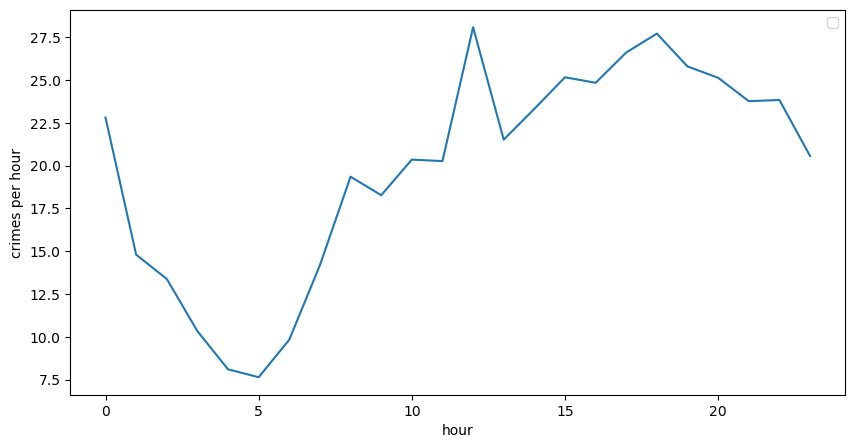

In [41]:
fig = plt.figure(figsize = (10, 5))
#for c in crime_categories_df['Category'].unique():
   # sub_df=houston_weather_crime_df[houston_weather_crime_df.offense_type == c]
crimes=houston_weather_crime_df[['occurrence_hour', 'offense_count']] \
    .groupby(houston_weather_crime_df['occurrence_hour']).count() \
    .drop(columns=['occurrence_hour']).reset_index().sort_values(by='occurrence_hour')
#plt.plot(houston_weather_crime_df['occurrence_hour'].unique(), crimes, label="Category: " + c)
#plt.legend(numpoints=1)
#print(houston_weather_crime_df['occurrence_hour'])
print(crimes, num_hours)
plt.plot(crimes['occurrence_hour'].values, crimes['offense_count'].values / num_hours)
plt.xlabel('hour')
plt.ylabel("crimes per hour")
        
plt.legend()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


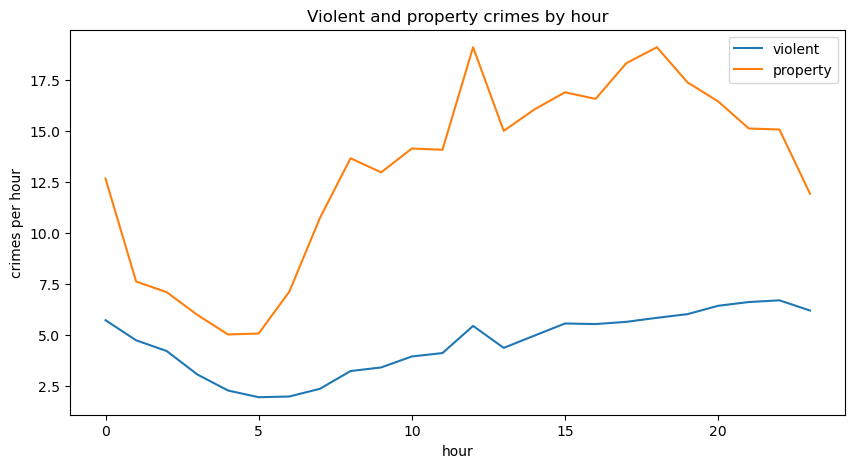

In [52]:
bins = [i for i in range(24)]
print(bins)
n = len(bins)
fig = plt.figure(figsize = (10, 5))
plt.title('Violent and property crimes by hour')
for c in ['violent', 'property']: #crime_categories_df['Category'].unique():
    # print(c, w, houston_weather_crime_df[w].unique())
    sub_df=houston_weather_crime_df[houston_weather_crime_df.offense_type == c]
    crimes=sub_df[['occurrence_hour', 'offense_count']]
    crimes=crimes.rename(columns={'occurrence_hour': 'h'})
    #print(c, crimes)
    crimes=crimes.groupby('h').count().reset_index().sort_values(by='h')
    #print(c, crimes)
    plt.plot(crimes['h'].values, crimes['offense_count'] / num_hours, label=c)
    
plt.xlabel('hour')
plt.ylabel("crimes per hour")
        
plt.legend()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


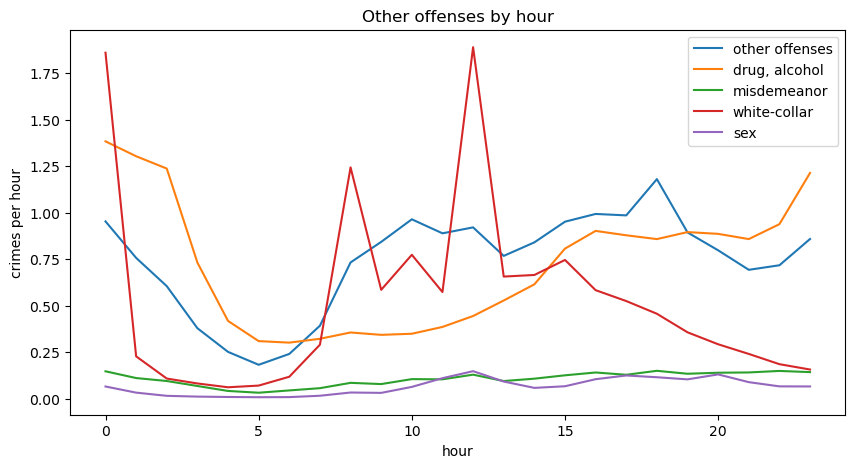

In [26]:
bins = [i for i in range(24)]
print(bins)
n = len(bins)
fig = plt.figure(figsize = (10, 5))
plt.title('Other offenses by hour')
for c in crime_categories_df['Category'].unique():
    if c in {'violent', 'property'}: continue
    # print(c, w, houston_weather_crime_df[w].unique())
    sub_df=houston_weather_crime_df[houston_weather_crime_df.offense_type == c]
    crimes=sub_df[['occurrence_hour', 'offense_count']].groupby(sub_df['occurrence_hour']).count()
    x = sub_df['occurrence_hour'].unique()
    x = sorted(x)
    #print(x)
    plt.plot(x, crimes['offense_count'] / num_hours, label=c)
    
plt.xlabel('hour')
plt.ylabel("crimes per hour")
        
plt.legend()
plt.show()

In [27]:
day_night_crimes_counts = houston_weather_crime_df.groupby(['is_day ()'])['offense_count'].sum()
day_night_labels=['day','night']
day_night_colors = ["yellow", "gray"]
total = sum(day_night_crimes_counts)
print(total)

2218151.0


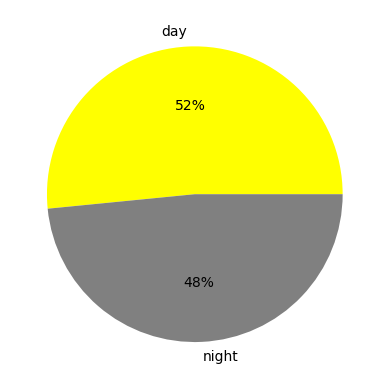

In [28]:
plt.pie(day_night_crimes_counts,labels = day_night_labels,colors = day_night_colors, autopct='%1.0f%%')
plt.show()

violent [ 2589  6124 10744 14698 15498 17943 18697 24744 19853 22580 25282 25155
 15014  5609]
property [ 7182 22626 48774 62062 58924 64232 63956 86773 68157 72922 76747 75280
 49542 19248]
other offenses [ 230  759 1786 3331 3833 4384 4042 4187 3491 3821 4326 4515 2660 1009]
drug, alcohol [ 463  944 1467 1621 1563 1590 1756 2023 2402 2796 3669 4101 2436  785]
misdemeanor [ 40 136 261 391 361 482 477 591 435 493 575 644 323 118]
white-collar [ 115  369 1323 5652 2662 3518 2608 8586 2986 3025 3392 2654 1368  424]
sex [ 15  30  76 155 146 292 505 676 423 268 308 480 327 106]


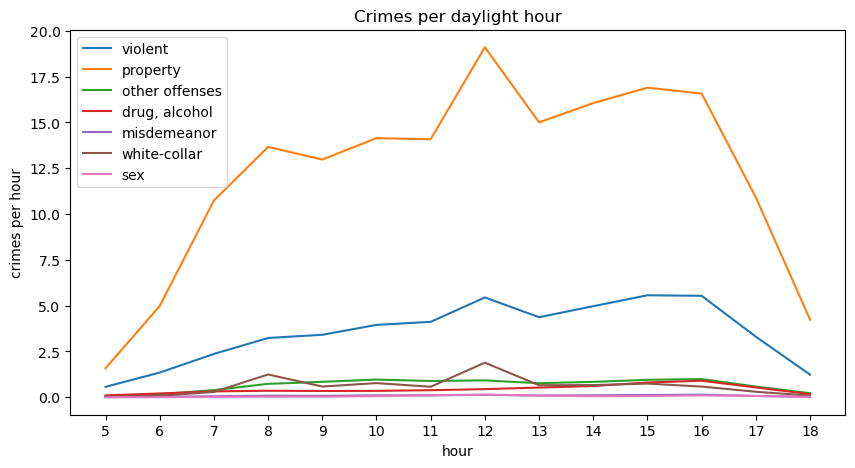

In [35]:
fig = plt.figure(figsize = (10, 5))
w = 'occurrence_hour'
plt.title('Crimes per daylight hour')
for c in crime_categories_df['Category'].unique():
    # TODO: num_hours here should be a count of daylight hours.
    sub_df=houston_weather_crime_df[(houston_weather_crime_df.offense_type == c) & (houston_weather_crime_df['is_day ()'] ==0 )]
    crimes=sub_df[[w, 'offense_count']].groupby(w).count().reset_index().sort_values(by=w)
    print(c, crimes['offense_count'].values)
    #print('x', x, crimes[w].values)
    #print('offense_count', crimes['offense_count'].values())
    x = crimes[w].values.tolist()
    y = (crimes['offense_count'].values / num_hours).tolist()
    i = 0
    while i < len(x) - 1 and x[i] + 1 == x[i+1]:
        i += 1
    i += 1
    if i < len(x):
        x = x[i:] + x[:i]
        y = y[i:] + y[:i]
    x = [str(h) for h in x]
    plt.plot(x, y, label=c)
    
plt.xlabel('hour')
plt.ylabel("crimes per hour")
        
plt.legend()
plt.show()

violent [26014 21540 19143 13926 10363  6280  2907 10633 20935 27364 29223 30056
 30441 28162]
property [57537 34613 32243 27187 22837 15870  9738 33670 67533 78951 74715 68693
 68465 54157]
other offenses [4333 3442 2752 1725 1147  602  338 1820 4356 4064 3627 3151 3262 3904]
drug, alcohol [6288 5924 5623 3327 1903  947  429 1558 3116 4072 4029 3901 4266 5517]
misdemeanor [673 508 436 314 193 110  70 265 567 613 638 645 682 653]
white-collar [8452 1038  496  376  283  209  171 1020 1654 1625 1333 1097  847  716]
sex [302 152  74  55  46  25  13 244 422 476 597 408 305 303]


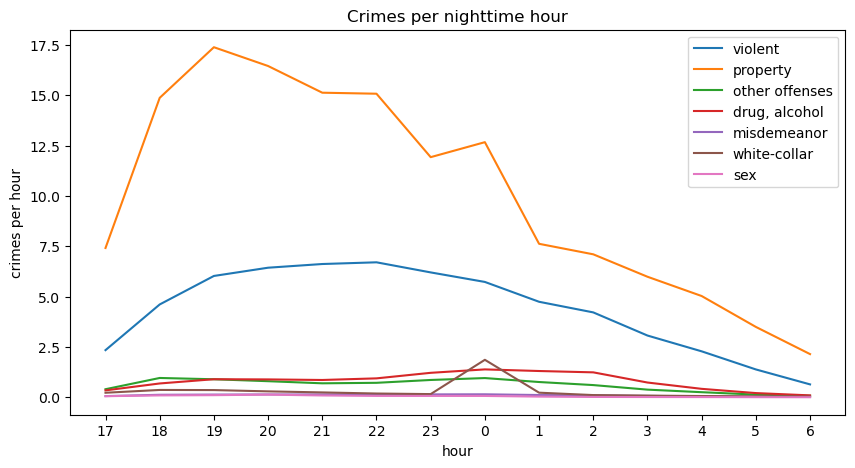

In [36]:
fig = plt.figure(figsize = (10, 5))
w = 'occurrence_hour'
plt.title('Crimes per nighttime hour')
for c in crime_categories_df['Category'].unique():
    # TODO: num_hours here should be a count of daylight hours.
    sub_df=houston_weather_crime_df[(houston_weather_crime_df.offense_type == c) & (houston_weather_crime_df['is_day ()'] ==1 )]
    crimes=sub_df[[w, 'offense_count']].groupby(w).count().reset_index().sort_values(by=w)
    print(c, crimes['offense_count'].values)
    #print('x', x, crimes[w].values)
    #print('offense_count', crimes['offense_count'].values())
    x = crimes[w].values.tolist()
    y = (crimes['offense_count'].values / num_hours).tolist()
    i = 0
    while i < len(x) - 1 and x[i] + 1 == x[i+1]:
        i += 1
    i += 1
    if i < len(x):
        x = x[i:] + x[:i]
        y = y[i:] + y[:i]
    x = [str(h) for h in x]
    plt.plot(x, y, label=c)
    
plt.xlabel('hour')
plt.ylabel("crimes per hour")
        
plt.legend()
plt.show()

In [31]:
night_crimes_df = houston_weather_crime_df[houston_weather_crime_df["is_day ()"] == 0]
night_crimes_df.columns


Index(['index', 'Unnamed: 0', 'occurrence_date', 'occurrence_hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'weathercode (wmo code)', 'surface_pressure (hPa)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windgusts_10m (km/h)', 'is_day ()', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'offense_type', 'offense_count', 'beat',
       'premise', 'block_range', 'street_name', 'street_type', 'suffix'],
      dtype='object')

In [32]:
night_crimes_df=night_crimes_df.groupby(night_crimes_df['offense_type'])['offense_count'].sum()
night_crimes_df = night_crimes_df.reset_index()
night_crimes_df

,offense_type,offense_count
0,1,4.0
1,"drug, alcohol",27616.0
2,misdemeanor,5327.0
3,other offenses,42374.0
4,property,780586.0
5,sex,3807.0
6,violent,245399.0
7,white-collar,38682.0


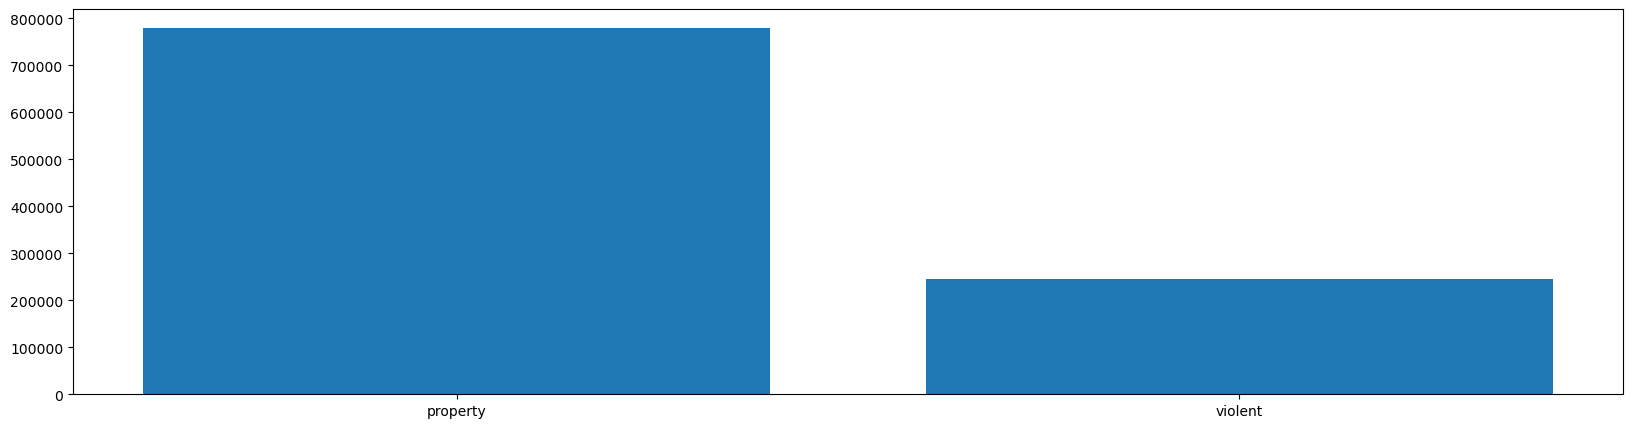

In [33]:
night_crimes_df = night_crimes_df[night_crimes_df['offense_type'].isin(['violent','property'])]
night_crimes_df = night_crimes_df.sort_values('offense_count', ascending=False)
fig = plt.figure(figsize = (20, 5))
plt.bar(night_crimes_df['offense_type'],night_crimes_df['offense_count'])
plt.show()

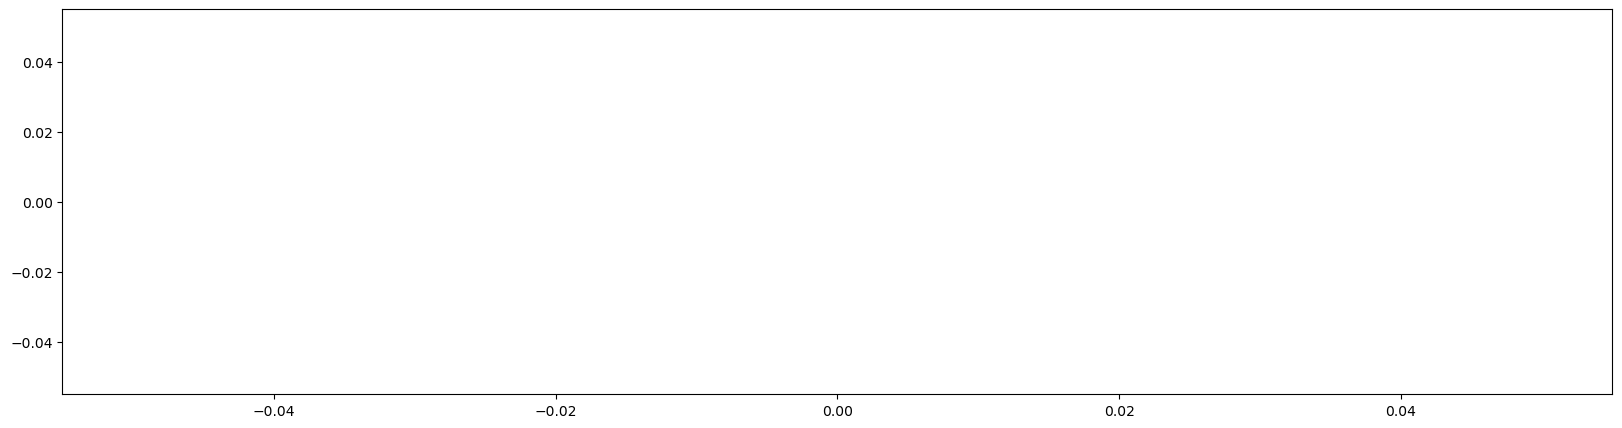

In [34]:
night_crimes_df = night_crimes_df[~night_crimes_df['offense_type'].isin(['violent','property'])]
night_crimes_df = night_crimes_df.sort_values('offense_count', ascending=False)
fig = plt.figure(figsize = (20, 5))
plt.bar(night_crimes_df['offense_type'],night_crimes_df['offense_count'])
plt.show()